<a href="https://colab.research.google.com/github/ML-Challenge/week4-unsupervised-learning/blob/master/L2.Visualization%20with%20hierarchical%20clustering%20and%20t-SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>

In this lesson, we'll learn about two unsupervised learning techniques for data visualization, hierarchical clustering and t-SNE. Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.

# Setup

In [1]:
# Download lesson datasets
# Required if you're using Google Colab
#!wget "https://github.com/ML-Challenge/week4-unsupervised-learning/raw/master/datasets.zip"
#!unzip -o datasets.zip

In [2]:
# Import utils
# We'll be using this module throughout the lesson
import utils

In [3]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [20, 10]

# Visualizing hierarchies

## How many merges?

If there are 5 data samples, how many merge operations will occur in a hierarchical clustering? To help answer this question, think back to the example of hierarchical clustering using 6 countries. How many merge operations did that example have?

**Posible Answers**

1. 4 merges
2. 5 merges
3. This can't be known in advance.

In [4]:
# Enter 1, 2 or 3 as parameter
utils.how_many_merges(1)

Well done! With 5 data samples, there would be 4 merge operations, and with 6 data samples, there would be 5 merges, and so on.


## Hierarchical clustering of the grain data

The SciPy `linkage()` function performs hierarchical clustering on an array of samples. Let's Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result. A sample of the grain measurements is provided in the array `grain`, while the variety of each grain sample is given by the list `varieties`.

In [5]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

In [6]:
# Calculate the linkage: mergings
mergings = linkage(utils.grain, method='complete')

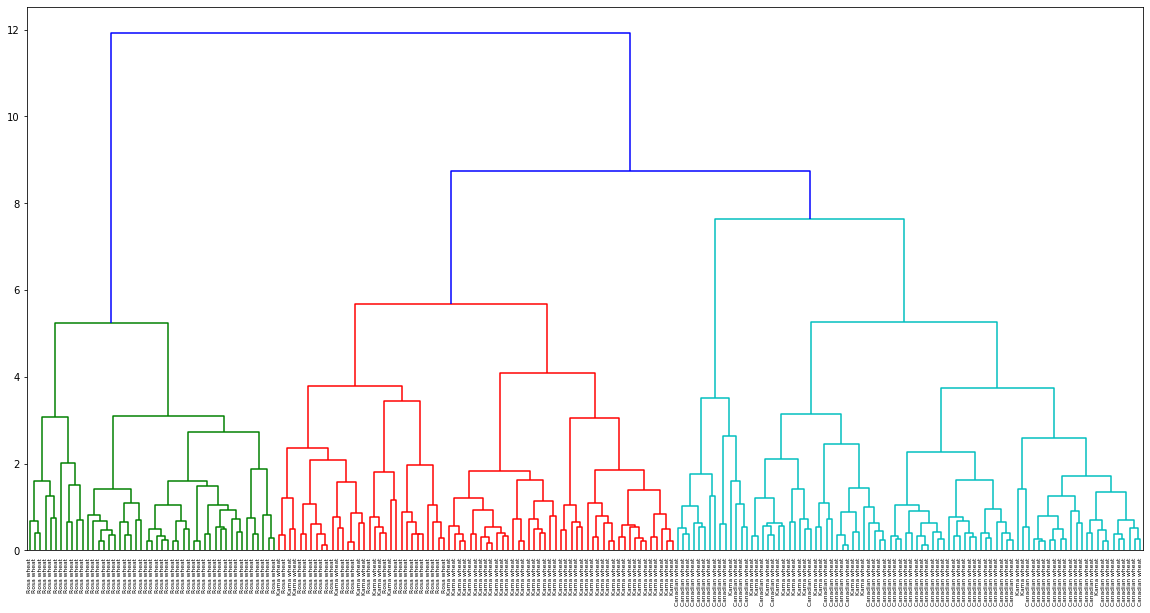

In [7]:
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=utils.varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

Dendrograms are a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.

## Hierarchies of stocks

In lesson 1, we used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. We are given a NumPy array of price movements `movements`, where the rows correspond to companies, and a list of the company names `companies`. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so we'll need to use the `normalize()` function from `sklearn.preprocessing` instead of `Normalizer`.

In [8]:
# Import normalize
from sklearn.preprocessing import normalize 

In [9]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(utils.movements)

In [10]:
# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

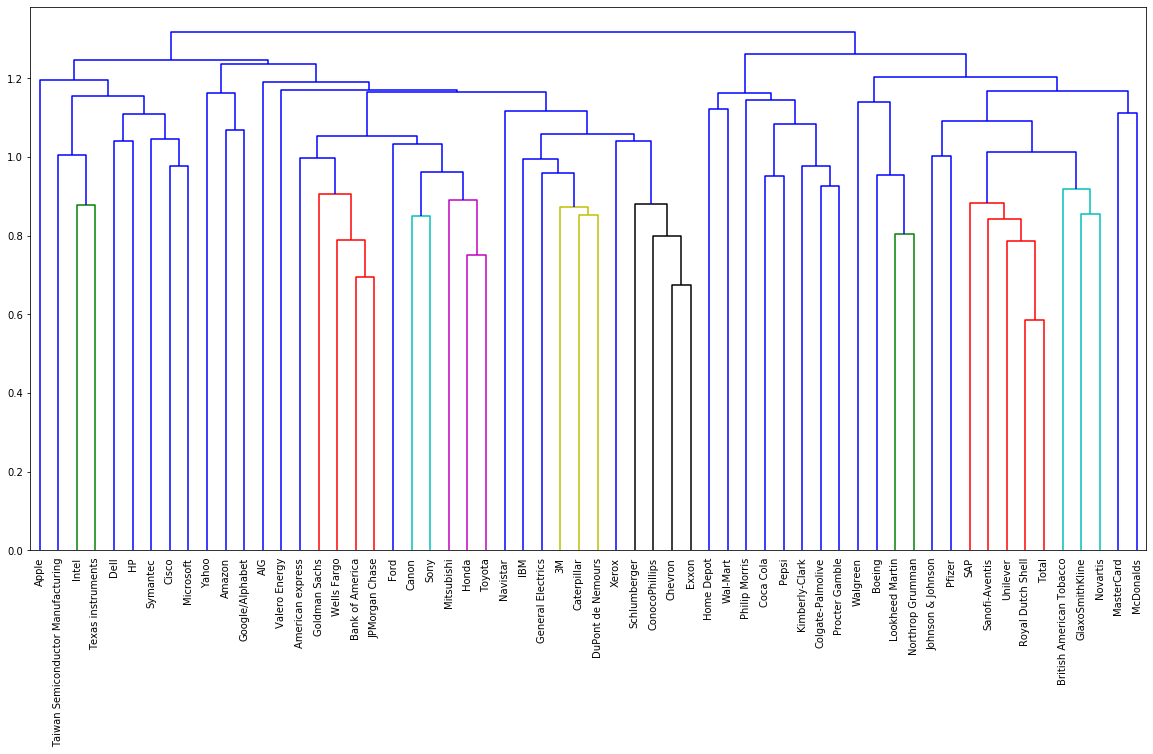

In [11]:
# Plot the dendrogram
dendrogram(mergings, labels=utils.companies, leaf_rotation=90, leaf_font_size=10)
plt.show()

We can produce great visualizations such as this with hierarchical clustering, but it can be used for more than just visualizations.

# Cluster labels in hierarchical clustering

## Which clusters are closest?

We learned that the linkage method defines how the distance between clusters is measured. In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. In single linkage, the distance between clusters is the distance between the closest points of the clusters.

Consider the three clusters in the diagram. Which of the following statements are true?

![Clusters Riddle](assets/cluster_linkage_riddle.png)

A. In single linkage, Cluster 3 is the closest to Cluster 2.<br>
B. In complete linkage, Cluster 1 is the closest to Cluster 2.

**Posible Answers**

1. Neither A nor B
2. A only
3. Both A and B.

In [12]:
# Enter 1, 2 or 3 as parameter
utils.clusters_linkage_riddle(3)

Well done!


## Different linkage, different hierarchical clustering!

We saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. Now, let's perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one before. Different linkage, different hierarchical clustering!

In [13]:
# Calculate the linkage: mergings
mergings = linkage(utils.eurovision_samples, method='single')

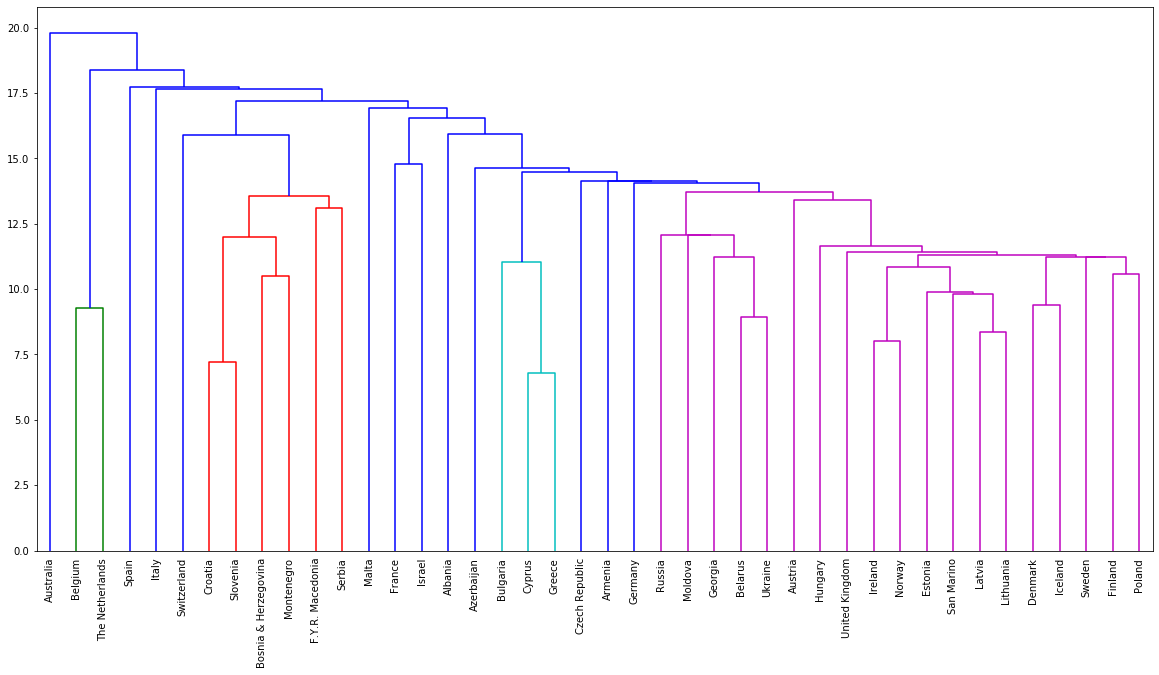

In [14]:
# Plot the dendrogram
dendrogram(mergings, labels=utils.country_names, leaf_rotation=90, leaf_font_size=10)
plt.show()

Performing single linkage hierarchical clustering produces a different dendrogram!

## Extracting the cluster labels

We will now, use the `fcluster()` function to extract the cluster labels for intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

In [15]:
# Perform the necessary imports
from scipy.cluster.hierarchy import fcluster

In [16]:
# Calculate the linkage: mergings
mergings = linkage(utils.grain, method='complete')

In [17]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

In [18]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': utils.varieties})

In [19]:
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


Fantastic - we've now mastered the fundamentals of k-Means and agglomerative hierarchical clustering. Next, we'll learn about t-SNE, which is a powerful tool for visualizing high dimensional data.

# t-SNE for 2-dimensional maps

## t-SNE visualization of grain dataset

In this example, we'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. We will use the grain samples and a list `variety_numbers` giving the variety number of each grain sample.

In [20]:
# Import TSNE
from sklearn.manifold import TSNE

In [21]:
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

In [22]:
# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(utils.grain)

In [23]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

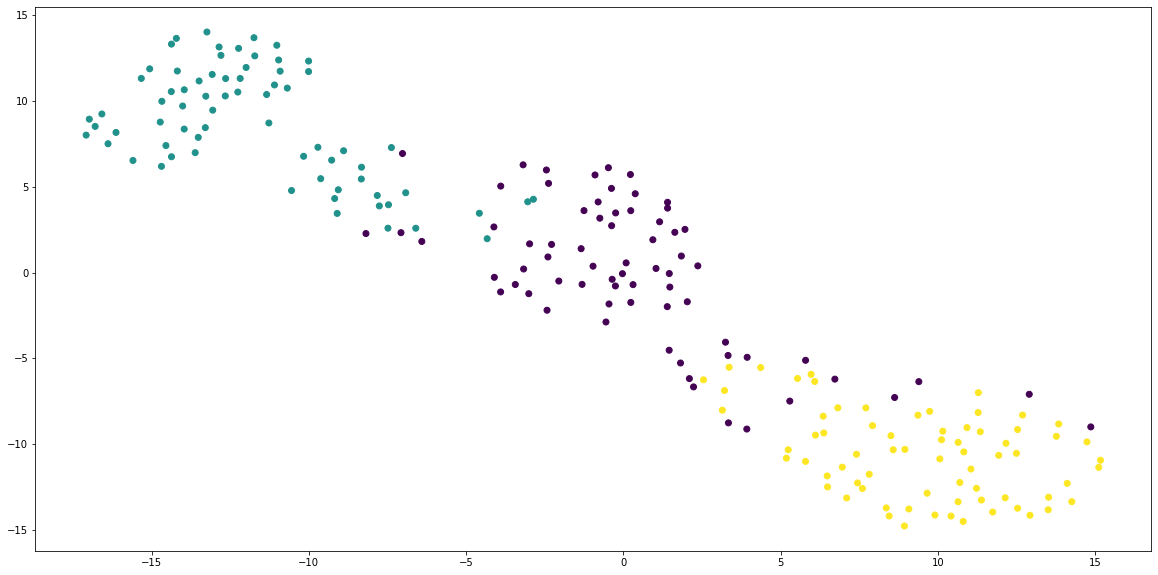

In [25]:
# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=utils.variety_numbers)
plt.show()

As we can see, the t-SNE visualization manages to separate the 3 varieties of grain samples. But how will it perform on the stock data? We'll find out in the next example!

## A t-SNE map of the stock market

t-SNE provides great visualizations when the individual samples can be labeled. In this example, we'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives us a map of the stock market! The stock price movements for each company are available as the array `normalized_movements`. The list companies gives the name of each company.

In [26]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

In [27]:
# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

In [28]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

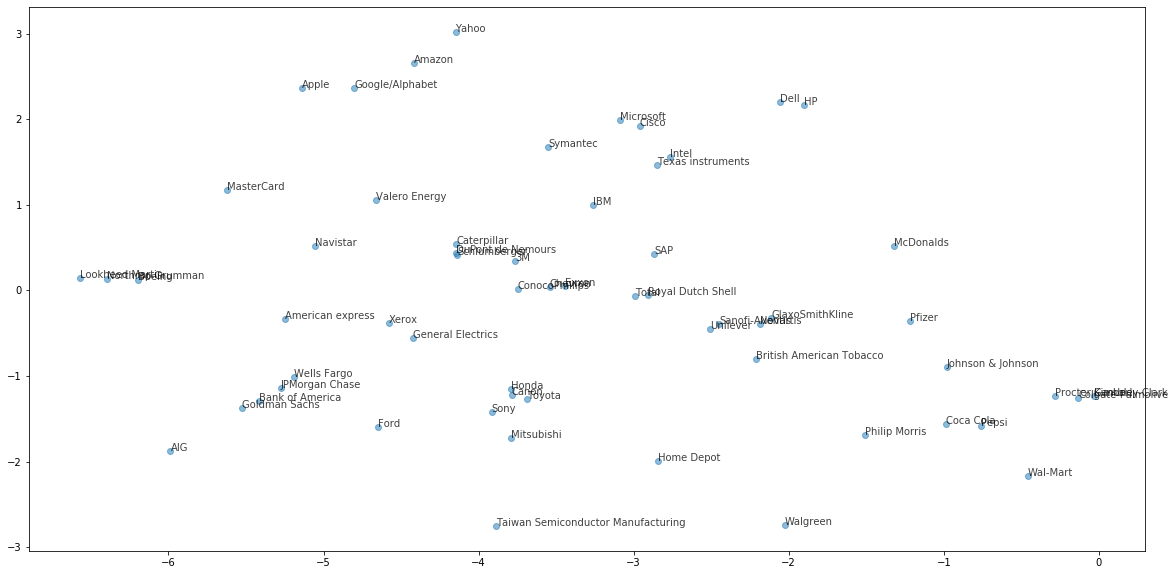

In [30]:
# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, utils.companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)
plt.show()

It's visualizations such as this that make t-SNE such a powerful tool for extracting quick insights from high dimensional data.